<a href="https://colab.research.google.com/github/PsorTheDoctor/artificial-intelligence/blob/master/modern_approach/text_to_image/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stable Diffusion

In [ ]:
 !pip install -q --upgrade diffusers transformers scipy
 !huggingface-cli login

##Text to image

{'trained_betas'} was not found in config. Values will be initialized to default values.
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


  0%|          | 0/51 [00:00<?, ?it/s]

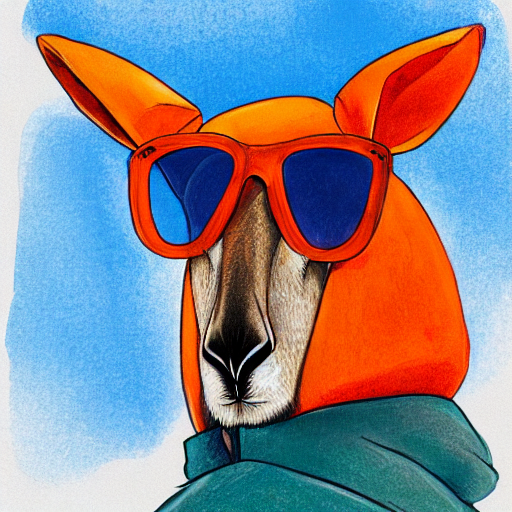

In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

model = 'CompVis/stable-diffusion-v1-4'
device = 'cuda'

pipe = StableDiffusionPipeline.from_pretrained(model, use_auth_token=True)
pipe = pipe.to(device)

prompt = 'kangaroo wearing an orange hoodie and blue sunglasses in photorealistic style'
with autocast(device):
  img = pipe(prompt, guidance_scale=7.5)['sample'][0]

img.save('{}.png'.format(prompt))
img

###Multiple images from a single prompt

In [ ]:
n_images = 3
lst = []

for _ in range(n_images):
  with autocast(device):
    lst.append(pipe(prompt, guidance_scale=7.5)['sample'][0])

for i in range(n_images):
  lst[i].save(f'result{i}.png')

##Image to image

In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

model = 'CompVis/stable-diffusion-v1-4'
device = 'cuda'

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model, torch_dtype=torch.float16
)
pipe = pipe.to(device)

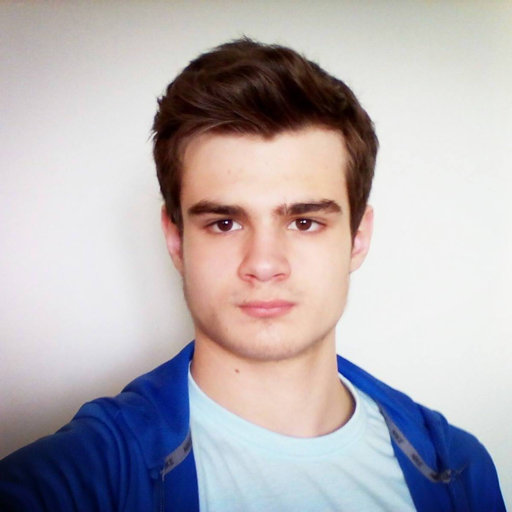

In [4]:
init_img = Image.open('adam.jpg').convert('RGB').resize((512, 512))
init_img

  0%|          | 0/37 [00:00<?, ?it/s]

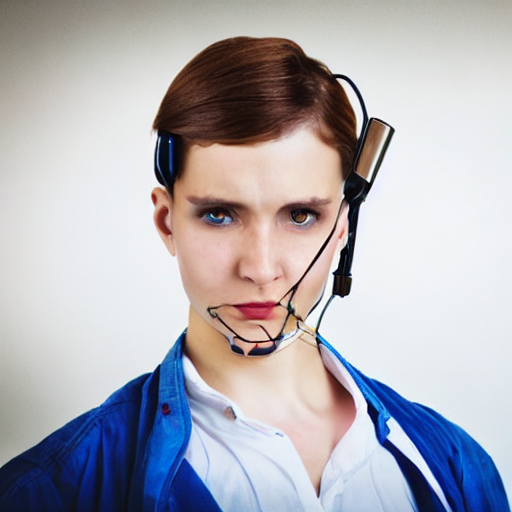

In [11]:
prompt = 'a cyborg'
generator = torch.Generator(device=device).manual_seed(1024)
img = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5, 
           generator=generator).images[0]

img.save('{}.png'.format(prompt))
img

###Using LSM Discrete Scheduler

In [12]:
from diffusers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = lms

  0%|          | 0/37 [00:00<?, ?it/s]

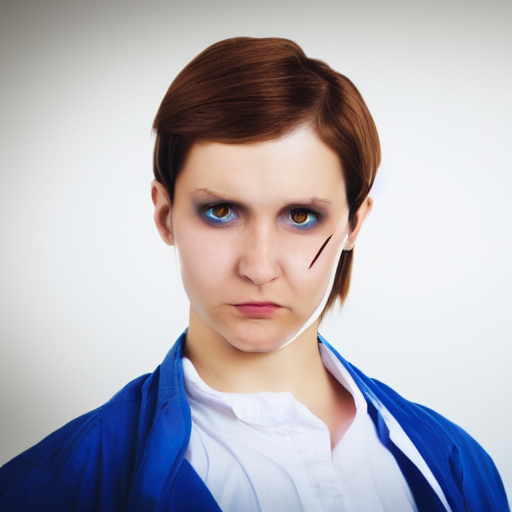

In [13]:
generator = torch.Generator(device=device).manual_seed(1024)
img = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5, 
           generator=generator).images[0]

img.save('{}.png'.format(prompt))
img